# This notebook is ML project for personal education purpose

## copyright : Sang Wook Kim 2022

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.3f}".format

print("Imported modules.")

Imported modules.


In [2]:
# Import database. Since this is practice, I will look a whole dataset first.
base_df = pd.read_csv("./database/IKEA/IKEA_SA_Furniture_Web_Scrapings_sss.csv")
base_df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.000,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,nan,99.000,51.000
1,1,368814,NORDVIKEN,Bar furniture,995.000,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,nan,105.000,80.000
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.000,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,nan,nan,nan
3,3,80155205,STIG,Bar furniture,69.000,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000
4,4,30180504,NORBERG,Bar furniture,225.000,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000


In [3]:
base_df.shape

(3694, 14)

In [4]:
# Drop unnecessary component
base_df = base_df.drop(["Unnamed: 0","link"],axis=1)

In [5]:
base_df.iloc[0:7]

,item_id,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.000,No old price,True,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,nan,99.000,51.000
1,368814,NORDVIKEN,Bar furniture,995.000,No old price,False,No,"Bar table, 140x80 cm",Francis Cayouette,nan,105.000,80.000
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.000,No old price,False,No,Bar table and 4 bar stools,Francis Cayouette,nan,nan,nan
3,80155205,STIG,Bar furniture,69.000,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000
4,30180504,NORBERG,Bar furniture,225.000,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000
5,10122647,INGOLF,Bar furniture,345.000,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.000,91.000,40.000
6,70404875,FRANKLIN,Bar furniture,129.000,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000


In [6]:
base_df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width'],
      dtype='object')

In [7]:
# Are there missing feature values for a large number of observations?
for line in base_df.count():
    print(line)

3694
3694
3694
3694
3694
3694
3694
3694
3694
2231
2706
3105


In [8]:
# Are there any unexpected values?
print(set(base_df['sellable_online']), set(base_df['other_colors']))

{False, True} {'No', 'Yes'}


In [9]:
# I will drop rows with nan for now
target_df = base_df.dropna()
dummy = target_df[['sellable_online', 'other_colors']]
dummy = dummy.applymap(lambda x: 1 if x == 'Yes' or x == True else 0)
dummy

# target_df.loc[:, ('sellable_online', 'other_colors')] = \
#     target_df.loc[:, ('sellable_online', 'other_colors')].applymap(lambda x: 1 if x == 'Yes' or x == True else 0)

,sellable_online,other_colors
3,1,1
4,1,0
5,1,0
6,1,0
8,1,0
...,...,...
3683,1,1
3684,1,0
3685,1,1
3686,1,0


In [10]:
target_df[['sellable_online', 'other_colors']] = dummy[['sellable_online', 'other_colors']]

/home/sang/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
target_df

,item_id,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,80155205,STIG,Bar furniture,69.000,No old price,1,1,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000
4,30180504,NORBERG,Bar furniture,225.000,No old price,1,0,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000
5,10122647,INGOLF,Bar furniture,345.000,No old price,1,0,"Bar stool with backrest, 63 cm",Carina Bengs,45.000,91.000,40.000
6,70404875,FRANKLIN,Bar furniture,129.000,No old price,1,0,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000
8,50406465,FRANKLIN,Bar furniture,129.000,No old price,1,0,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000
...,...,...,...,...,...,...,...,...,...,...,...,...
3683,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,1260.000,No old price,1,1,"Wardrobe combination, 75x60x2...",Ehlén Johansson/IKEA of Sweden,60.000,201.000,75.000
3684,49157565,ELVARLI,Wardrobes,1245.000,"SR 1,735",1,0,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.000,216.000,164.000
3685,59324936,PAX / FORSAND,Wardrobes,2100.000,No old price,1,1,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.000,236.000,100.000
3686,69330475,PAX / HOKKSUND,Wardrobes,3985.000,No old price,1,0,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.000,236.000,150.000


In [12]:
# sanity check
print(set(target_df['sellable_online']), set(target_df['other_colors']))

{0, 1} {0, 1}


In [13]:
# For facets
from IPython.core.display import display, HTML
import base64
# !pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

# Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': target_df, 'name': 'Data'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

### 'price' is highly asymmetric. 'sellable_online' has only 0.68% of zero. 'depth' might have to be clipped.
### Possible new feature 'volumn' : depth * height * width
### 'short_description' has 992 unique values. I should not blindly use the feature.
### using old_price as feature is risky (label leakage)

<AxesSubplot:>

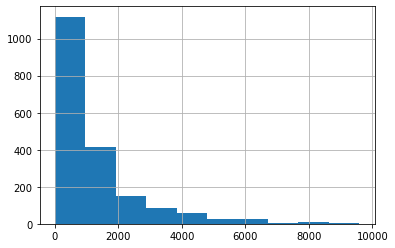

In [14]:
target_df['price'].hist()

<AxesSubplot:>

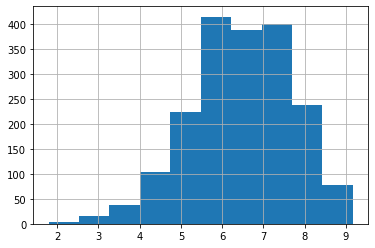

In [15]:
import math
logprice = target_df['price'].apply(lambda x: math.log(x))
logprice.hist()

In [16]:
target_df['price'] = logprice
target_df

<ipython-input-16-90512806ba61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['price'] = logprice


,item_id,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,80155205,STIG,Bar furniture,4.234,No old price,1,1,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000
4,30180504,NORBERG,Bar furniture,5.416,No old price,1,0,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000
5,10122647,INGOLF,Bar furniture,5.844,No old price,1,0,"Bar stool with backrest, 63 cm",Carina Bengs,45.000,91.000,40.000
6,70404875,FRANKLIN,Bar furniture,4.860,No old price,1,0,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000
8,50406465,FRANKLIN,Bar furniture,4.860,No old price,1,0,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000
...,...,...,...,...,...,...,...,...,...,...,...,...
3683,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,7.139,No old price,1,1,"Wardrobe combination, 75x60x2...",Ehlén Johansson/IKEA of Sweden,60.000,201.000,75.000
3684,49157565,ELVARLI,Wardrobes,7.127,"SR 1,735",1,0,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.000,216.000,164.000
3685,59324936,PAX / FORSAND,Wardrobes,7.650,No old price,1,1,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.000,236.000,100.000
3686,69330475,PAX / HOKKSUND,Wardrobes,8.290,No old price,1,0,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.000,236.000,150.000


<AxesSubplot:>

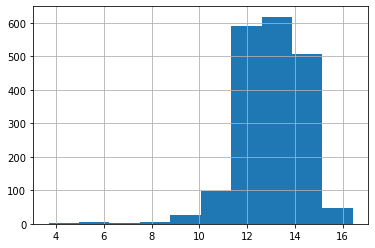

In [17]:
import math
vol = target_df['depth']*target_df['height']*target_df['width']
vol = vol.apply(lambda x: math.log(x))
vol.hist()

In [18]:
vol.describe()

count   1899.000
mean      13.031
std        1.348
min        3.689
25%       12.219
50%       13.055
75%       14.078
max       16.428
dtype: float64

In [19]:
target_df['volumn'] = vol
target_df

<ipython-input-19-39e61f6e6d24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['volumn'] = vol


,item_id,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width,volumn
3,80155205,STIG,Bar furniture,4.234,No old price,1,1,"Bar stool with backrest, 74 cm",Henrik Preutz,50.000,100.000,60.000,12.612
4,30180504,NORBERG,Bar furniture,5.416,No old price,1,0,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.000,43.000,74.000,12.160
5,10122647,INGOLF,Bar furniture,5.844,No old price,1,0,"Bar stool with backrest, 63 cm",Carina Bengs,45.000,91.000,40.000,12.006
6,70404875,FRANKLIN,Bar furniture,4.860,No old price,1,0,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000,12.250
8,50406465,FRANKLIN,Bar furniture,4.860,No old price,1,0,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.000,95.000,50.000,12.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,39329299,PAX / FORSAND/VIKEDAL,Wardrobes,7.139,No old price,1,1,"Wardrobe combination, 75x60x2...",Ehlén Johansson/IKEA of Sweden,60.000,201.000,75.000,13.715
3684,49157565,ELVARLI,Wardrobes,7.127,"SR 1,735",1,0,"2 sections, 165x55x216 cm",Ehlén Johansson/IKEA of Sweden,55.000,216.000,164.000,14.482
3685,59324936,PAX / FORSAND,Wardrobes,7.650,No old price,1,1,"Wardrobe combination, 100x60x...",IKEA of Sweden/Ehlén Johansson,60.000,236.000,100.000,14.163
3686,69330475,PAX / HOKKSUND,Wardrobes,8.290,No old price,1,0,"Wardrobe combination, 150x66x...",IKEA of Sweden/Ehlén Johansson,66.000,236.000,150.000,14.664


In [20]:
def pandas_to_numpy(data):
    '''Convert a pandas DataFrame into a Numpy array'''
    # Drop empty rows.
    data = data.dropna(how="any", axis=0)

    # Separate DataFrame into two Numpy arrays"
    labels = np.array(data['price'])
    features = data.drop('price', axis=1)
    features = {name:np.array(value) for name, value in features.items()}

    return features, labels

In [21]:
# Creating a train data with 70% of original dataframe
df_train = target_df.sample(frac = 0.7)
 
# Creating a test data with the rest of the 30%
df_test = target_df.drop(df_train.index)

## First, try train with simple numeric column "other_colors" and "volumn"

In [22]:
train1 = df_train[['other_colors','volumn','price']]
train1.corr()

,other_colors,volumn,price
other_colors,1.000,0.107,0.192
volumn,0.107,1.000,0.828
price,0.192,0.828,1.000


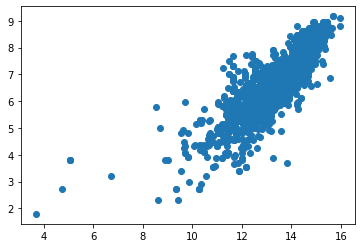

In [23]:
plt.scatter(train1['volumn'],train1['price'])

volumn and price has a correlation 0.837 and expected to be a good linear regression problem

In [24]:
# Define the functions that build and train a model
def build_model_1(my_learning_rate):
    """Create and compile a simple linear regression model"""
    # Most simple tf.keras models are sequential. 
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

    # Compile the model topography into code that 
    # TensorFlow can efficiently execute. Configure 
    # training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model           


def train_model_1(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the 
    # model. The model will train for the specified number 
    # of epochs, gradually learning how the feature values
    # relate to the label values. 
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
    # you can also shuffle = True or False

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean 
    #squared error at each epoch. 
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [25]:
# Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = feature.min()
    y0 = trained_bias + (trained_weight * x0)
    x1 = feature.max()
    y1 = trained_bias + (trained_weight * x1)

    plt.plot([x0, x1], [y0, y1], c='r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [26]:
feature_1, label_1 = pandas_to_numpy(train1[['volumn','price']])

Epoch 1/30
1329/1329 [==============================] - 1s 375us/step - loss: 0.6202 - root_mean_squared_error: 0.7875
Epoch 2/30
1329/1329 [==============================] - 0s 365us/step - loss: 0.6065 - root_mean_squared_error: 0.7788
Epoch 3/30
1329/1329 [==============================] - 0s 366us/step - loss: 0.5744 - root_mean_squared_error: 0.7579
Epoch 4/30
1329/1329 [==============================] - 0s 369us/step - loss: 0.5594 - root_mean_squared_error: 0.7479
Epoch 5/30
1329/1329 [==============================] - 0s 372us/step - loss: 0.5548 - root_mean_squared_error: 0.7448
Epoch 6/30
1329/1329 [==============================] - 0s 372us/step - loss: 0.5372 - root_mean_squared_error: 0.7329
Epoch 7/30
1329/1329 [==============================] - 1s 377us/step - loss: 0.5411 - root_mean_squared_error: 0.7356
Epoch 8/30
1329/1329 [==============================] - 0s 368us/step - loss: 0.5293 - root_mean_squared_error: 0.7275
Epoch 9/30
1329/1329 [==========================

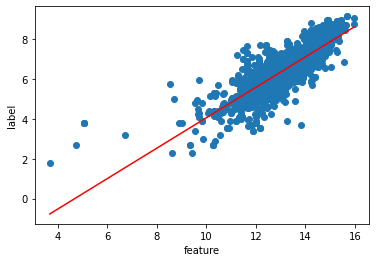

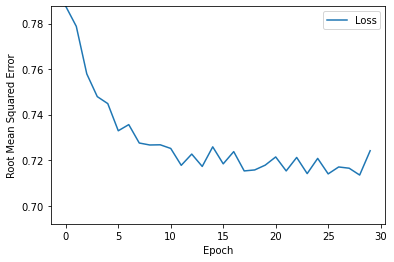

In [28]:
# set hyperparameters
learning_rate=0.01
epochs=30
my_batch_size=1 

my_model_1 = build_model_1(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model_1(my_model_1, feature_1['volumn'], 
                                                           label_1, epochs,
                                                           my_batch_size)
plot_the_model(float(trained_weight), float(trained_bias), feature_1['volumn'], label_1)
plot_the_loss_curve(epochs, rmse)

In [30]:
# Check the prediction values
def predict_house_values_1(n, feature, label):
    """Predict house values based on a feature."""

    batch = np.array(df_test[feature])
    predicted_values = my_model_1.predict_on_batch(x=batch)
    
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in original   in original")
    print("--------------------------------------")
    for i in range(n):
        print ("%.3f %6.0f %15.0f" % (batch[i],
                                       math.exp(np.array(df_test[label])[i]),
                                       math.exp(predicted_values[i][0]) ))

In [31]:
my_model_1.evaluate(x = np.array(df_test['volumn']), y = np.array(df_test['price']), batch_size=my_batch_size)

570/570 [==============================] - 0s 353us/step - loss: 0.4754 - root_mean_squared_error: 0.6895


[0.4754287898540497, 0.6895134449005127]

In [32]:
predict_house_values_1(30, 'volumn', 'price')

feature   label          predicted
  value   value          value
          in original   in original
--------------------------------------
12.250    129             325
12.250    129             325
12.370    149             357
12.314    395             342
12.246    395             324
11.652    595             206
12.370    149             357
12.246    435             324
12.468    445             385
12.064    920             282
11.628   1495             202
12.413   2600             369
11.628   2185             202
11.646   1595             205
12.651    200             442
12.392   1195             363
12.392   3339             363
12.399   1767             365
12.399   2905             365
14.507   3595            1834
14.547   5780            1890
14.168   1596            1413
14.489   1845            1808
14.384   2932            1668
14.817   4390            2324
14.251   3355            1507
14.859   7765            2400
14.509   4120            1836
14.455   1996      

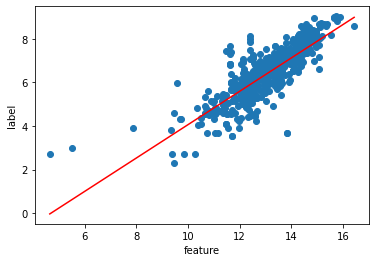

In [33]:
plot_the_model(float(trained_weight), float(trained_bias), np.array(df_test['volumn']), np.array(df_test['price']))

## Not bad, but it's very poor when it represent the price in original scale
## Let's include categorical features and other color

In [34]:
target_df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'other_colors', 'short_description', 'designer', 'depth', 'height',
       'width', 'volumn'],
      dtype='object')

In [35]:
category_list = list(pd.unique(target_df['category']))
category_list

['Bar furniture',
 'Beds',
 'Bookcases & shelving units',
 'Cabinets & cupboards',
 'Café furniture',
 'Chairs',
 'Chests of drawers & drawer units',
 "Children's furniture",
 'Nursery furniture',
 'Outdoor furniture',
 'Room dividers',
 'Sideboards, buffets & console tables',
 'Sofas & armchairs',
 'Tables & desks',
 'Trolleys',
 'TV & media furniture',
 'Wardrobes']

In [36]:
# Create categorical feature columns

# Let's explore categorical features. 'category' has 17 unique values.'designer' has 191 unique values.
# 'name' and 'short_description' have too many unique values.

# Since we don't know the full range of possible values with 'designer',
# we'll use categorical_column_with_hash_bucket() to help map
# each feature string into an integer ID.
designer = tf.feature_column.categorical_column_with_hash_bucket(
    "designer", hash_bucket_size=191)

category = tf.feature_column.categorical_column_with_vocabulary_list(
    "category", category_list)

<AxesSubplot:>

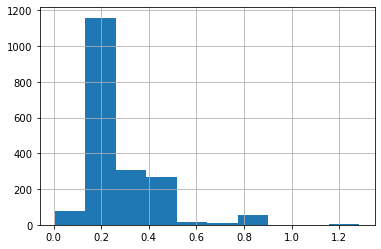

In [37]:
# We might have to normalize the numeric features.
# Numeric features we will use are 'depth', 'height', 'width'
depth_re = target_df['depth']/200
depth_re.hist()

<AxesSubplot:>

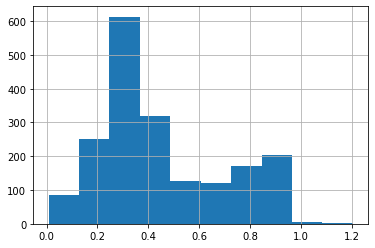

In [38]:
height_re = target_df['height']/250
height_re.hist()

<AxesSubplot:>

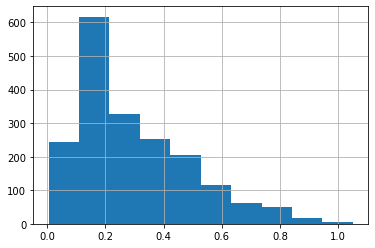

In [39]:
width_re = target_df['width']/400
width_re.hist()

In [40]:
# I will use fixed linear scale (which isn't always the best)
dimensional_rescale = [200, 250, 400]
df_train['depth'] = df_train['depth']/dimensional_rescale[0]
df_train['height'] = df_train['height']/dimensional_rescale[1]
df_train['width'] = df_train['width']/dimensional_rescale[2]

In [41]:
# I will use fixed linear scale (which isn't always the best)
dimensional_rescale = [200, 250, 400]
df_test['depth'] = df_test['depth']/dimensional_rescale[0]
df_test['height'] = df_test['height']/dimensional_rescale[1]
df_test['width'] = df_test['width']/dimensional_rescale[2]

In [42]:
# Create numeric feature columns
# For Numeric features, we can just call on feature_column.numeric_column()
# to use its raw value instead of having to create a map between value and ID.
other_colors = tf.feature_column.numeric_column("other_colors")
depth = tf.feature_column.numeric_column("depth")
height = tf.feature_column.numeric_column("height")
width = tf.feature_column.numeric_column("width")

In [43]:
# Deep columns required to define the input layer of the model
deep_columns = [
#     tf.feature_column.embedding_column(designer, dimension=3),
#     tf.feature_column.embedding_column(category, dimension=3),
    other_colors,
    depth,
    height,
    width
]

my_feature_layer = tf.keras.layers.DenseFeatures(deep_columns)

# Parameters from form fill-ins
HIDDEN_UNITS_LAYER_01 = 32 #@param
HIDDEN_UNITS_LAYER_02 = 16 #@param
LEARNING_RATE = 0.005 #@param
L1_REGULARIZATION_STRENGTH = 0.001 #@param
L2_REGULARIZATION_STRENGTH = 0.001 #@param

RANDOM_SEED = 512
tf.random.set_seed(RANDOM_SEED)

regularizer = tf.keras.regularizers.l1_l2(
    l1=L1_REGULARIZATION_STRENGTH, l2=L2_REGULARIZATION_STRENGTH)
model = None

# model = tf.keras.Sequential([
#     layers.DenseFeatures(deep_columns),
#     layers.Dense(HIDDEN_UNITS_LAYER_01, activation='relu', kernel_regularizer=regularizer),
#     layers.Dropout(rate=0.25),
#     layers.Dense(HIDDEN_UNITS_LAYER_02, activation='relu', kernel_regularizer=regularizer),
#     layers.Dense(1)
#     ])

model = tf.keras.Sequential()
model.add(my_feature_layer)
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),  
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.MeanSquaredError()]
             )

In [44]:
# Fit Deep Neural Net Model to the Adult Training Dataset

EPOCHS = 20 #@param
BATCH_SIZE = 20 #@param

# to_train = df_train[['category', 'price',
#        'other_colors', 'designer', 'depth', 'height',
#        'width']]

to_train = df_train[['price',
       'other_colors', 'depth', 'height',
       'width']]

features, labels = pandas_to_numpy(to_train)
model.fit(x=features, y=labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
67/67 [==============================] - 0s 569us/step - loss: 18.3756 - mean_squared_error: 18.3756
Epoch 2/20
67/67 [==============================] - 0s 545us/step - loss: 1.0822 - mean_squared_error: 1.0822
Epoch 3/20
67/67 [==============================] - 0s 488us/step - loss: 0.6733 - mean_squared_error: 0.6733
Epoch 4/20
67/67 [==============================] - 0s 492us/step - loss: 0.5612 - mean_squared_error: 0.5612
Epoch 5/20
67/67 [==============================] - 0s 495us/step - loss: 0.5168 - mean_squared_error: 0.5168
Epoch 6/20
67/67 [==============================] - 0s 515us/step - loss: 0.5001 - mean_squared_error: 0.5001
Epoch 7/20
67/67 [==============================] - 0s 529us/step - loss: 0.4880 - mean_squared_error: 0.4880
Epoch 8/20
67/67 [==============================] - 0s 546us/step - loss: 0.4794 - mean_squared_error: 0.4794
Epoch 9/

In [45]:
# Evaluate Deep Neural Net Performance
# to_test = df_test[['category', 'price',
#        'other_colors', 'designer', 'depth', 'height',
#        'width']]

to_test = df_test[['price',
       'other_colors', 'depth', 'height',
       'width']]

features_test, labels_test = pandas_to_numpy(to_test)

model.evaluate(x=features_test, y=labels_test, batch_size=BATCH_SIZE);

Consider rewriting this model with the Functional API.
29/29 [==============================] - 0s 483us/step - loss: 0.4781 - mean_squared_error: 0.4781


In [46]:
# Deep columns required to define the input layer of the model
deep_columns = [
    tf.feature_column.embedding_column(designer, dimension=8),
    tf.feature_column.embedding_column(category, dimension=3),
    other_colors,
    depth,
    height,
    width
]

# my_feature_layer = tf.keras.layers.DenseFeatures(deep_columns)

# Parameters from form fill-ins
HIDDEN_UNITS_LAYER_01 = 32 #@param
HIDDEN_UNITS_LAYER_02 = 16 #@param
LEARNING_RATE = 0.005 #@param
L1_REGULARIZATION_STRENGTH = 0.001 #@param
L2_REGULARIZATION_STRENGTH = 0.001 #@param

RANDOM_SEED = 512
tf.random.set_seed(RANDOM_SEED)

regularizer = tf.keras.regularizers.l1_l2(
    l1=L1_REGULARIZATION_STRENGTH, l2=L2_REGULARIZATION_STRENGTH)
model = None

model = tf.keras.Sequential([
    layers.DenseFeatures(deep_columns),
    layers.Dense(HIDDEN_UNITS_LAYER_01, activation='relu', kernel_regularizer=regularizer),
    layers.Dropout(rate=0.20),
    layers.Dense(HIDDEN_UNITS_LAYER_02, activation='relu', kernel_regularizer=regularizer),
    layers.Dense(1)
    ])

# model = tf.keras.Sequential()
# model.add(my_feature_layer)
# model.add(tf.keras.layers.Dense(4))
# model.add(tf.keras.layers.Dense(4))
# model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),  
              loss="mean_squared_error",
              metrics=[tf.keras.metrics.MeanSquaredError()]
             )

In [47]:
# Fit Deep Neural Net Model to the Adult Training Dataset

EPOCHS = 30 #@param
BATCH_SIZE = 20 #@param

to_train = df_train[['category', 'price',
       'other_colors', 'designer', 'depth', 'height',
       'width']]

# to_train = df_train[['price',
#        'other_colors', 'depth', 'height',
#        'width']]

features, labels = pandas_to_numpy(to_train)
model.fit(x=features, y=labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
67/67 [==============================] - 1s 654us/step - loss: 10.9809 - mean_squared_error: 10.7467
Epoch 2/30
67/67 [==============================] - 0s 644us/step - loss: 1.5145 - mean_squared_error: 1.2824
Epoch 3/30
67/67 [==============================] - 0s 670us/step - loss: 1.2331 - mean_squared_error: 1.0131
Epoch 4/30
67/67 [==============================] - 0s 666us/step - loss: 1.1220 - mean_squared_error: 0.9151
Epoch 5/30
67/67 [==============================] - 0s 691us/step - loss: 1.0700 - mean_squared_error: 0.8754
Epoch 6/30
67/67 [==============================] - 0s 645us/step - loss: 1.0493 - mean_squared_error: 0.8667
Epoch 7/30
67/67 [==============================] - 0s 638us/step - loss: 0.9938 - mean_squared_error: 0.8224
Epoch 8/30
67/67 [==============================] - 0s 631us/step - loss: 0.8888 - mean_squared_error: 0.7275
Epoch 9/

In [48]:
# Evaluate Deep Neural Net Performance
to_test = df_test[['category', 'price',
       'other_colors', 'designer', 'depth', 'height',
       'width']]

# to_test = df_test[['price',
#        'other_colors', 'depth', 'height',
#        'width']]

features_test, labels_test = pandas_to_numpy(to_test)

model.evaluate(x=features_test, y=labels_test, batch_size=BATCH_SIZE);

Consider rewriting this model with the Functional API.
29/29 [==============================] - 0s 563us/step - loss: 0.4295 - mean_squared_error: 0.3567


In [49]:
predicted_values2 = model.predict_on_batch(x=features_test)

Consider rewriting this model with the Functional API.


In [51]:
import math

In [52]:
print("label          predicted")
print("value          value")
print("in original   in original")
print("--------------------------------------")

for i in range(30):
    print ("%6.0f %15.0f" % ( math.exp(labels_test[i]),
                                   math.exp(predicted_values2[i][0]) ))

label          predicted
value          value
in original   in original
--------------------------------------
   129             168
   129             168
   149             180
   395             234
   395             665
   595             343
   149             180
   435             314
   445             233
   920            1385
  1495            1218
  2600             734
  2185             976
  1595             938
   200             663
  1195             721
  3339             749
  1767             725
  2905             725
  3595            1988
  5780            4294
  1596            2030
  1845            2479
  2932            5562
  4390            6481
  3355            2594
  7765            7373
  4120            3560
  1996            2484
   135             112


# I got better results with neural nets with categorical&numeric feature